# Pokemon Data Analysis


Date: 3rd November 2021

Author: Lim Boon Yao

Purpose: Analysis on Pokemon Data, for Fun :-)

Data Source: https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420/version/6

Data Credit: Mr.Mario Tormo Romero

In [1]:
# Import all the vital packages
import numpy as np
import pandas as pd
import missingno as msno

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

### Obtaining the data

With the data residing in google drive, the data are imported from there. 

In [2]:
# Importing the data
pkn = pd.read_csv('/content/drive/MyDrive/HO-Data/pokemon_data.csv')

### Initial Data Exploration

In [3]:
# Have first look of the data, what are we getting into
pkn.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [4]:
# Better view of all the columns available 
pkn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


There are several columns having missing data, but those missing data are there due to some pokemons not having the attributes. However some data are not really useful for our analysis, proceed to remove them. 

In [5]:
# Removing the unncessary columns
pkn = pkn.drop(['Unnamed: 0', 'pokedex_number', 'german_name', 'japanese_name'], axis=1)
# Removing all the against columns
pkn = pkn.drop(['against_normal', 'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice', 'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic', 'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark', 'against_steel', 'against_fairy'], axis=1) 

# setting the pokemon name as index
pkn.set_index('name', inplace=True)

# Viewing the data again
pkn.head()

,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0
Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0
Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0
Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0
Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0


In [6]:
# Setting pokemon name as index allow easy selection of pokemon we wish to find, eg: Finding Pikachu
pkn.loc['Pikachu']

generation                      1
status                     Normal
species             Mouse Pokémon
type_number                     1
type_1                   Electric
type_2                        NaN
height_m                      0.4
weight_kg                       6
abilities_number                2
ability_1                  Static
ability_2                     NaN
ability_hidden      Lightning Rod
total_points                  320
hp                             35
attack                         55
defense                        40
sp_attack                      50
sp_defense                     50
speed                          90
catch_rate                    190
base_friendship                70
base_experience               112
growth_rate           Medium Fast
egg_type_number                 2
egg_type_1                  Fairy
egg_type_2                  Field
percentage_male                50
egg_cycles                     10
Name: Pikachu, dtype: object

### Some simple Data Cleaning

In [7]:
# View all the columns again
pkn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, Bulbasaur to Eternatus Eternamax
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   generation        1028 non-null   int64  
 1   status            1028 non-null   object 
 2   species           1028 non-null   object 
 3   type_number       1028 non-null   int64  
 4   type_1            1028 non-null   object 
 5   type_2            542 non-null    object 
 6   height_m          1028 non-null   float64
 7   weight_kg         1027 non-null   float64
 8   abilities_number  1028 non-null   int64  
 9   ability_1         1025 non-null   object 
 10  ability_2         513 non-null    object 
 11  ability_hidden    810 non-null    object 
 12  total_points      1028 non-null   float64
 13  hp                1028 non-null   float64
 14  attack            1028 non-null   float64
 15  defense           1028 non-null   float64
 16  sp_attack         1028 n

In [8]:
# Replacing the Null values in type_2, ability_2, ability_hidden with None
# Also replacing the NaN in weight to be 0, assuming the pokemon has no weight
pkn['type_2'] = pkn['type_2'].fillna('None')
pkn['ability_2'] = pkn['ability_2'].fillna('None')
pkn['ability_hidden'] = pkn['ability_hidden'].fillna('None')
pkn['weight_kg'] = pkn['weight_kg'].fillna(0)

In [9]:
pkn.head(20)

,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,None,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0
Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,None,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0
Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,None,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0
Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,None,None,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0
Charmander,1,Normal,Lizard Pokémon,1,Fire,None,0.6,8.5,2,Blaze,None,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0
Charmeleon,1,Normal,Flame Pokémon,1,Fire,None,1.1,19.0,2,Blaze,None,Solar Power,405.0,58.0,64.0,58.0,80.0,65.0,80.0,45.0,70.0,142.0,Medium Slow,2,Dragon,Monster,87.5,20.0
Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,None,Solar Power,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0
Mega Charizard X,1,Normal,Flame Pokémon,2,Fire,Dragon,1.7,110.5,1,Tough Claws,None,None,634.0,78.0,130.0,111.0,130.0,85.0,100.0,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0
Mega Charizard Y,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,100.5,1,Drought,None,None,634.0,78.0,104.0,78.0,159.0,115.0,100.0,45.0,70.0,285.0,Medium Slow,2,Dragon,Monster,87.5,20.0


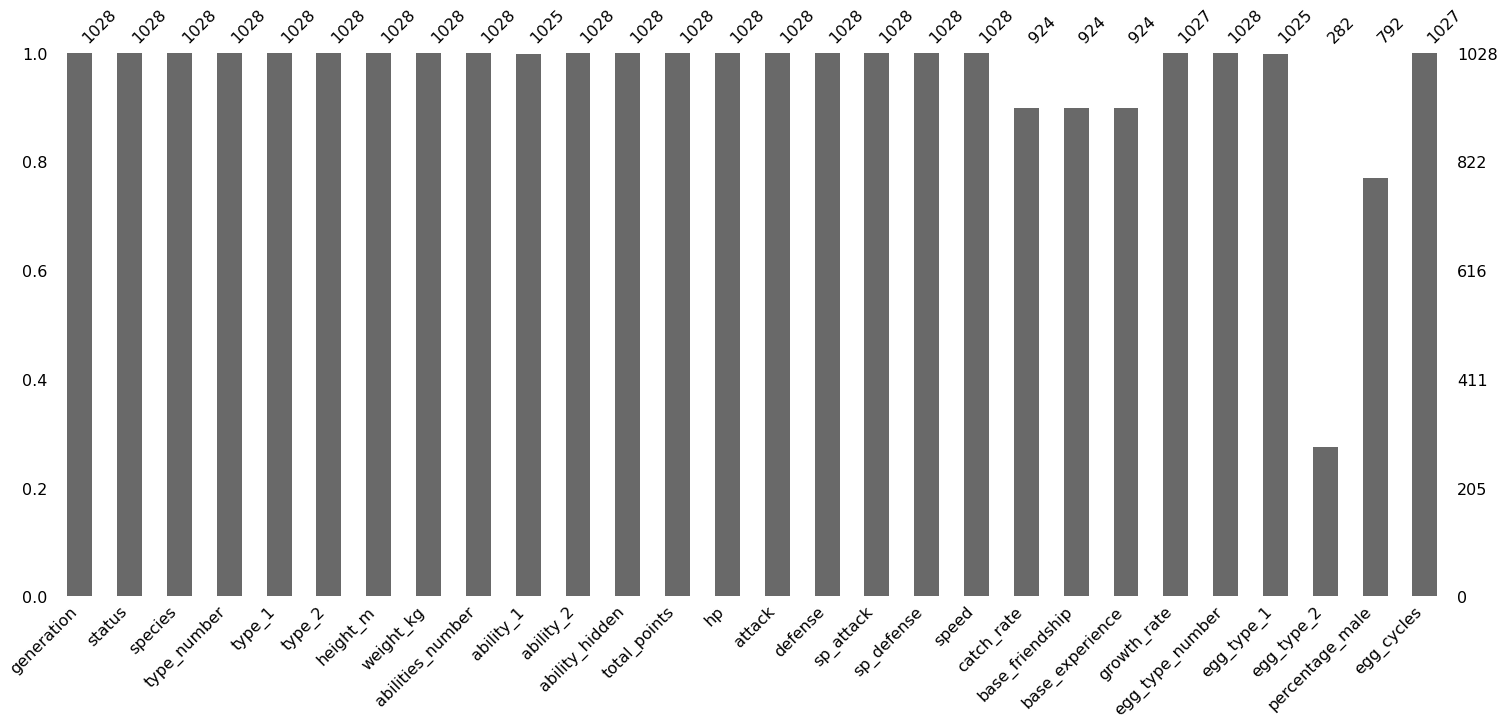

In [10]:
# Lets visualize the outcome of cleaning data
msno.bar(pkn)

The previous columns containing missing values were all replaced with 'None', as we are not interested much in breeding of the pokemon (egg types), those columns were remained as they are.

### Let's answer some questions

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

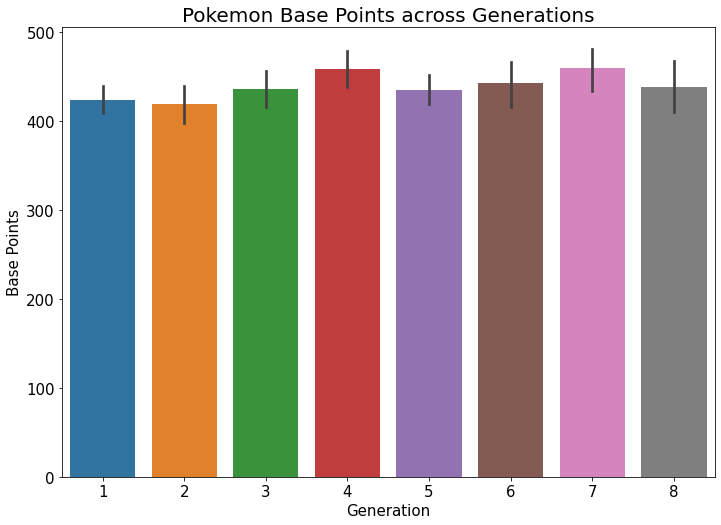

In [11]:
# Which generation of pokemon has better total_points? 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.barplot(x='generation', y='total_points', data=pkn)

plt.title('Pokemon Base Points across Generations', fontsize=20)
plt.xlabel('Generation', fontsize=15)
plt.ylabel('Base Points', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The pokemons have almost similar base points distribution across the generations. No generations are superior to other generations.

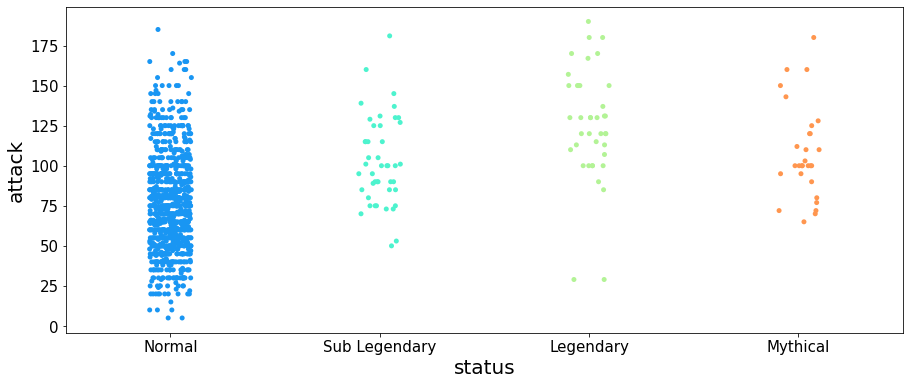

In [12]:
# Is legendary pokemon has better attack? 
plt.figure(figsize=(15,6))

plt.xlabel('Status of Pokemon', fontsize=20)
plt.ylabel('Pokemon Attacks', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.stripplot(x='status', y='attack', data=pkn, dodge=True, palette='rainbow')

plt.show()

With majority of pokemons falling under Normal category with various attaack points, single legendary or mythical pokemon has higher attack points compared to majority of normal pokemons. 

In [13]:
# We can find Normal pokemon with high attack on par with legendary and mythical pokemons
pkn.loc[(pkn['attack'] >= 150) & (pkn['status'].isin(['Normal']))]

# These pokemons would be good options for trainers to get them instead of going for harder mythical and legendary types. 

,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mega Beedrill,1,Normal,Poison Bee Pokémon,2,Bug,Poison,1.4,40.5,1,Adaptability,None,None,495.0,65.0,150.0,40.0,15.0,80.0,145.0,45.0,70.0,223.0,Medium Fast,1,Bug,NaN,50.0,15.0
Mega Pinsir,1,Normal,Stag Beetle Pokémon,2,Bug,Flying,1.7,59.0,1,Aerilate,None,None,600.0,65.0,155.0,120.0,65.0,90.0,105.0,45.0,70.0,210.0,Slow,1,Bug,NaN,50.0,25.0
Mega Gyarados,1,Normal,Atrocious Pokémon,2,Water,Dark,6.5,305.0,1,Mold Breaker,None,None,640.0,95.0,155.0,109.0,70.0,130.0,81.0,45.0,70.0,224.0,Slow,2,Dragon,Water 2,50.0,5.0
Mega Scizor,2,Normal,Pincer Pokémon,2,Bug,Steel,2.0,125.0,1,Technician,None,None,600.0,70.0,150.0,140.0,65.0,100.0,75.0,25.0,70.0,210.0,Medium Fast,1,Bug,NaN,50.0,25.0
Mega Heracross,2,Normal,Single Horn Pokémon,2,Bug,Fighting,1.7,62.5,1,Skill Link,None,None,600.0,80.0,185.0,115.0,40.0,105.0,75.0,45.0,70.0,210.0,Slow,1,Bug,NaN,50.0,25.0
Mega Tyranitar,2,Normal,Armor Pokémon,2,Rock,Dark,2.5,255.0,1,Sand Stream,None,None,700.0,100.0,164.0,150.0,95.0,120.0,71.0,45.0,35.0,315.0,Slow,1,Monster,NaN,50.0,40.0
Mega Blaziken,3,Normal,Blaze Pokémon,2,Fire,Fighting,1.9,52.0,1,Speed Boost,None,None,630.0,80.0,160.0,80.0,130.0,80.0,100.0,45.0,70.0,284.0,Medium Slow,1,Field,NaN,87.5,20.0
Mega Swampert,3,Normal,Mud Fish Pokémon,2,Water,Ground,1.9,102.0,1,Swift Swim,None,None,635.0,100.0,150.0,110.0,95.0,110.0,70.0,45.0,70.0,286.0,Medium Slow,2,Monster,Water 1,87.5,20.0
Slaking,3,Normal,Lazy Pokémon,1,Normal,None,2.0,130.5,1,Truant,None,None,670.0,150.0,160.0,100.0,95.0,65.0,100.0,45.0,70.0,252.0,Slow,1,Field,NaN,50.0,15.0


[Text(0.5, 0, 'total_points'),
 Text(1.5, 0, 'type_number'),
 Text(2.5, 0, 'abilities_number'),
 Text(3.5, 0, 'height_m'),
 Text(4.5, 0, 'weight_kg')]

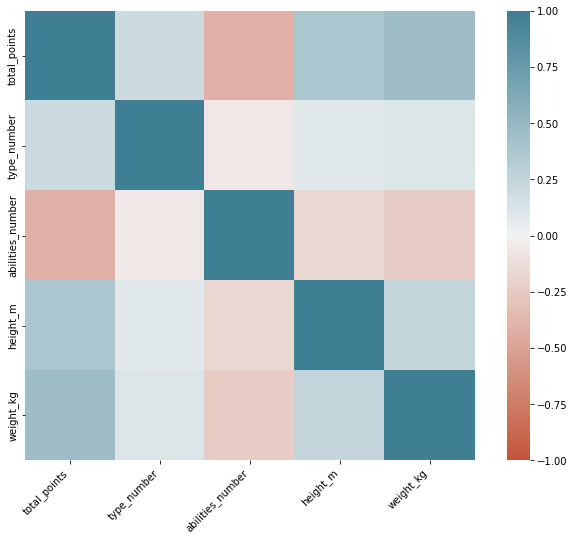

In [14]:
# Is pokemon types amount, abilities amount, height and weight related with pokemon base points?
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

corr = pkn[['total_points','type_number', 'abilities_number', 'height_m', 'weight_kg']].corr(method='pearson')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square= True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

The pokemons' attributes like height and weight is not much related to the total base points, in fact pokemons with more abilities tend to have lower total base points. Only pokemons with larger size (heights) are likely to have higher total base points. 

It is possible that larger size pokemons are more likely to be in mythical or legendary types. 

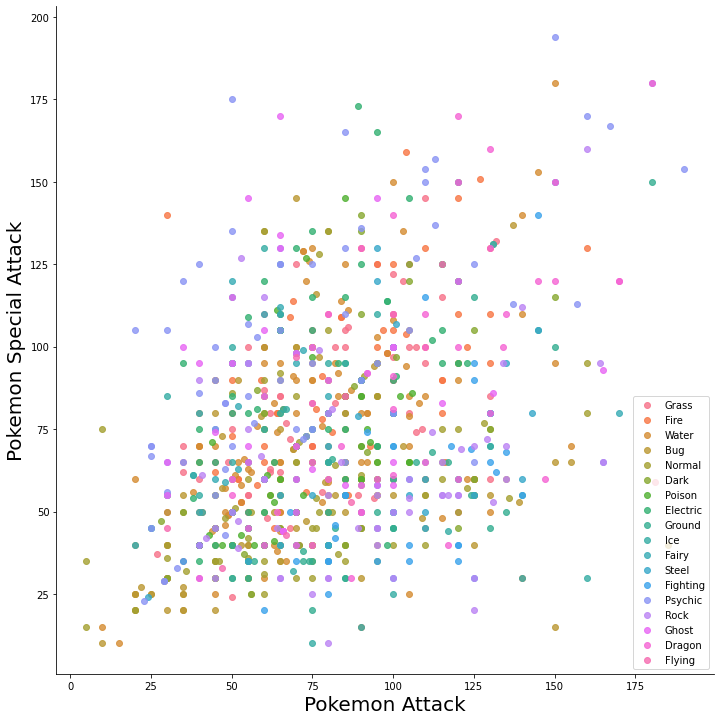

In [15]:
sns.lmplot(x='attack', y='sp_attack', data=pkn, fit_reg=False, hue='type_1', legend=False, height=10)

plt.xlabel('Pokemon Attack', fontsize=20)
plt.ylabel('Pokemon Special Attack', fontsize=20)

# Move legends elsewhere 
plt.legend(loc='lower right')

plt.show()

Looks like Psychic pokemons have the highest attack and specail attack, how about defense? 

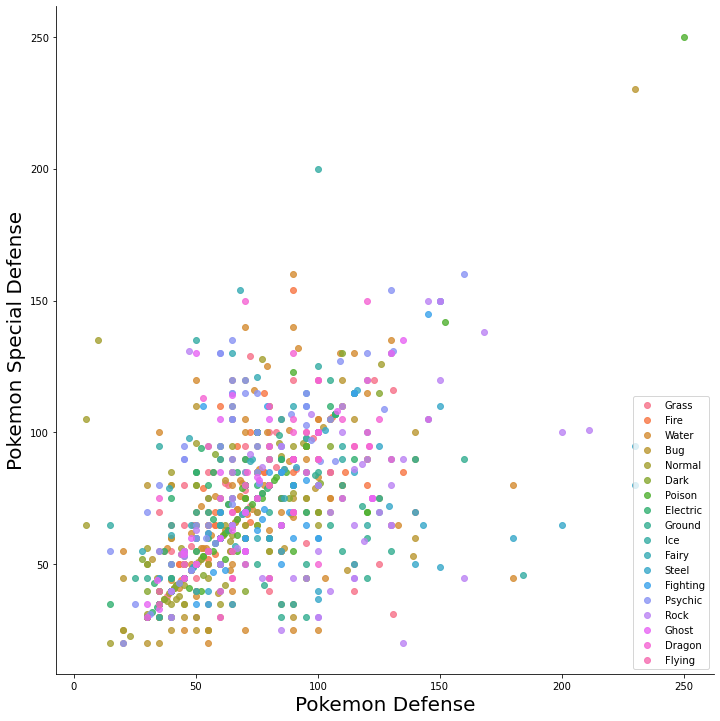

In [16]:
sns.lmplot(x='defense', y='sp_defense', data=pkn, fit_reg=False, hue='type_1', legend=False, height=10)

plt.xlabel('Pokemon Defense', fontsize=20)
plt.ylabel('Pokemon Special Defense', fontsize=20)

# Move legends elsewhere 
plt.legend(loc='lower right')

plt.show()

There is two pokemons on top on defense and special defense, looks like water and electric types. However it seems like ground pokemons generally have higher defense and special defense. Which make sense. 

In [17]:
# How about the pokemon types in normal, mythical or legendary pokemons? 
cross_tab = pd.crosstab(pkn['status'], pkn['type_1'])

# Let's see the cross tab outputs
cross_tab

type_1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
status,,,,,,,,,,,,,,,,,,
Legendary,0,1,10,0,3,2,1,0,2,0,2,0,0,2,12,0,1,3
Mythical,1,1,0,1,0,1,1,0,0,2,0,0,3,0,9,2,4,4
Normal,78,41,26,54,19,35,59,6,39,86,37,34,109,35,50,54,28,125
Sub Legendary,2,1,4,6,0,0,4,2,0,3,2,2,3,2,5,4,3,2


Most legendary pokemons are Psychic or Dragon types, as for mythical pokemons Psychic type is most prevalent, meanwhile Water, Normal, Grass or Bug types pokemons are the most in normal pokemons. 

From plots earlier, Legendary and Mythical pokemons with Psychic types appeared to be best for trainers as they tend to have high base points and attacks. 

### Machine Learning {Linear Regression}

In [25]:
# Import ML package
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
# First let's create a new column called 'avg_stats' comprising attributes like attack, sp_attack, defense, sp_defense
pkn['avg_stats'] = (pkn['attack'] + pkn['sp_attack'] + pkn['defense'] + pkn['sp_defense'])/4 

In [27]:
# Have a check of new created column
pkn['avg_stats'].head(5)

name
Bulbasaur         57.00
Ivysaur           71.25
Venusaur          91.25
Mega Venusaur    116.25
Charmander        51.25
Name: avg_stats, dtype: float64

In [28]:
# To make it simple, categorical variables will not be included as they have large amount of levels
# Set the x and y
x = pkn[['type_number', 'abilities_number', 'height_m', 'weight_kg', 'total_points', 'hp', 'speed']]
y = pkn['avg_stats']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# Create a Multiple Linear Regression
mlr = LinearRegression()

# Fit the model
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Check the intercept and coefficient
print(mlr.intercept_)

print(mlr.coef_)

-4.263256414560601e-14
[-7.51675330e-16  1.31838984e-14  2.68708666e-15 -8.32667268e-17
  2.50000000e-01 -2.50000000e-01 -2.50000000e-01]


From the results we get: 

*average stats* = -4.26 - 7.52 *type number* + 1.32 *abilities number* + 2.69 *height* - 8.33 *weight* + 2.50 *total points* - 2.5 *hp* - 2.5 *speed* 

In [31]:
# We can now try predictions with the model
y_predictions = mlr.predict(x_test)

In [33]:
# Let's check the performance of the model
score = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

print("Model Performance")
print("R2_score is: ", score)
print("MSE is: ", mse)
print("RMSE is: ", rmse)

Model Performance
R2_score is:  1.0
MSE is:  5.372219352992491e-28
RMSE is:  2.3178048565382915e-14


It is weird that the model has R2 score of 1, which means perfectly explained all the variability. There might be some errors else where I had performed? However it seems that if trainer wants a good balanced stats pokemons, they might want to go for:    

Pokemon with less types, more abilities, higher height but not weight, higher base points but with lower hp and speed 

End note: this is a small project but I am happy to do and learn from it, especailly from the visualization parts. 

Image credits to The Pokémon Company 

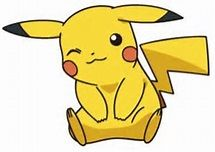

### End